# Grupo Zap teste Data Science

##### Feito por :
Lucas Reis Mendes

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.
import json
from pandas.io.json import json_normalize

# Import visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Importando dados e informações básicas

Ler a coleção de Json e transforma-lo em um dataframe, para isso usaremos o jason.loads() pois lemos string na função open(). Após, como temos dados aninhados, usaremos json_normalize() para chegarmos no nosso df.

In [2]:
#List output
with open('C:/Users/Lucas Reis/Desktop/Lucas/DataScience/Testes/ZAP/source-4-ds-train.json/source-4-ds-train.json', encoding="utf8") as file_data:
    data = file_data.readlines()
    
for i, item in enumerate(data):
    data[i] = json.loads(item)    
    
data_3 = json_normalize(data)    

#Split de treino / teste para validação, falaremos sobre isso mais tarde
data_3, data_3_test = train_test_split(data_3, test_size=0.2, random_state=42)

In [3]:
data_3.head()

,address.city,address.country,address.district,address.geoLocation.location.lat,address.geoLocation.location.lon,address.geoLocation.precision,address.locationId,address.neighborhood,address.state,address.street,...,pricingInfos.rentalTotalPrice,pricingInfos.yearlyIptu,publicationType,publisherId,suites,title,totalAreas,unitTypes,updatedAt,usableAreas
19384,São Paulo,,,-23.615095,-46.620880,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Saude,Cursino,São Paulo,Rua Filipe Cardoso,...,NaN,91.0,STANDARD,d9c0096a2f,1.0,"Sobrado residencial à venda, Saúde, São Paulo.",150.0,TWO_STORY_HOUSE,2019-02-24T22:53:53.682Z,150.0
34549,São Paulo,,,-23.573414,-46.672948,APPROXIMATE,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardins,Jardins,São Paulo,,...,2124.0,115.0,STANDARD,5834f834b1,NaN,"03611 - Flat 1 Dorm, JARDINS - SÃO PAULO/SP",NaN,FLAT,2019-02-07T13:24:17.345Z,32.0
119544,São Paulo,,,-23.471953,-46.564281,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Parque ...,Parque Edu Chaves,São Paulo,Rodovia Fernão Dias,...,105000.0,NaN,STANDARD,0ec61496e4,0.0,Comercial-São Paulo-PARQUE EDU CHAVES | Ref.: ...,21000.0,SHED_DEPOSIT_WAREHOUSE,2019-02-08T02:57:56.525Z,6000.0
68616,São Paulo,,,-23.488600,-46.606266,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Parada ...,Vila Dom Pedro II,São Paulo,Rua Doutor Marrei Júnior,...,NaN,NaN,STANDARD,20b0869949,0.0,Apartamento-São Paulo-parada inglesa | Ref.: 1...,49.0,APARTMENT,2019-02-08T04:11:29.814Z,49.0
64665,São Paulo,,,-23.543872,-46.646099,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Centro>Republica,República,São Paulo,Rua Marquês de Itu,...,NaN,0.0,STANDARD,0f3a8bbdb1,0.0,Apartamento 34 m² - 1 dormitório - 1 vaga,34.0,APARTMENT,2018-11-08T16:28:04.959Z,34.0


In [4]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107171 entries, 19384 to 121958
Data columns (total 37 columns):
address.city                        107171 non-null object
address.country                     107171 non-null object
address.district                    107171 non-null object
address.geoLocation.location.lat    107163 non-null float64
address.geoLocation.location.lon    107163 non-null float64
address.geoLocation.precision       107163 non-null object
address.locationId                  107171 non-null object
address.neighborhood                107171 non-null object
address.state                       107171 non-null object
address.street                      107171 non-null object
address.streetNumber                107171 non-null object
address.unitNumber                  107171 non-null object
address.zipCode                     107171 non-null object
address.zone                        107171 non-null object
bathrooms                           106440 non-null float

Temos 134 mil registros e 37 features, contendo 3 tipos de dados. Todos eles serão tratados em algum momento desse notebook.
Para os tipos de dados, todos eles terão que ser transformados em float, pois é o que nos pede os algorítmos de Machine Learning. 

## Hora da estatística

In [5]:
data_3.describe()

,address.geoLocation.location.lat,address.geoLocation.location.lon,bathrooms,bedrooms,parkingSpaces,pricingInfos.monthlyCondoFee,pricingInfos.price,pricingInfos.rentalTotalPrice,pricingInfos.yearlyIptu,suites,totalAreas,usableAreas
count,107163.000000,107163.000000,106440.000000,104755.000000,103658.000000,9.372400e+04,1.071710e+05,2.296100e+04,9.174300e+04,96301.000000,7.297600e+04,1.065670e+05
mean,-23.553983,-46.642797,2.379481,2.328519,2.442059,1.292642e+03,6.642902e+05,1.117793e+04,1.906923e+03,1.104724,1.645323e+04,2.237360e+02
std,0.182990,0.354707,2.184601,2.284917,5.216546,3.191218e+04,1.292622e+06,8.444911e+04,1.723163e+05,1.200237,4.115344e+06,6.320698e+03
min,-23.848153,-46.820973,0.000000,0.000000,0.000000,0.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,-23.594463,-46.684180,1.000000,2.000000,1.000000,0.000000e+00,1.750000e+05,2.310000e+03,0.000000e+00,0.000000,6.000000e+01,6.000000e+01
50%,-23.559048,-46.654062,2.000000,2.000000,2.000000,3.920000e+02,3.710000e+05,4.130000e+03,8.400000e+01,1.000000,1.200000e+02,1.060000e+02
75%,-23.527714,-46.607707,3.000000,3.000000,3.000000,8.532500e+02,7.000000e+05,9.170000e+03,3.610000e+02,2.000000,2.500000e+02,2.000000e+02
max,0.000000,0.000000,200.000000,600.000000,589.000000,4.059999e+06,7.000000e+07,1.190000e+07,5.003746e+07,42.000000,1.111111e+09,2.025000e+06


Podemos ver alguns detalhes do nosso dataframe, alguns dados estão ruim de se analísar pois ainda trataremos eles. Já encontramos alguns dados que chamamos de outliers ou valor berrante, 600 quartos, 200 banheiros ou 589 vagas de garagem me parecem um pouco longe da realidade. 

Também podemos ver média e desvio padrão, mas eles não estão nos mostrando a realidade por causa de nossos outliers, vamos tratar eles primeiro depois voltamos para a estatística    

## Corrigindo e limpando dados

Para tratar os outliers desse nosso data set, usarei os Interquartile ranges( https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) para isso definirei uma função onde posso controlar os dados que chamaremos de absurdo.

In [6]:
# Argumentos: Dataset - o dataset em questão
#             nome_col - a coluna
#             k - variável que controla o peso
def remover_outliers(dataset, nome_col, k):
    q1 = dataset[nome_col].quantile(0.25)
    q3 = dataset[nome_col].quantile(0.75)
    iqr = q3-q1  # Interquartile range
    qbaixo  = q1-k*iqr
    qcima = q3+k*iqr
    dataset_final = dataset.loc[(dataset[nome_col] > qbaixo) & (dataset[nome_col] < qcima)]
    print(qbaixo)
    print(qcima)
    return dataset_final

Para visualizar os outliers em questão e podermos ver a função funcionando, usaremos a visualização Boxplot, onde podemos ver o primeiro e terceiro quartil e sua mediana, usaremos a coluna preço

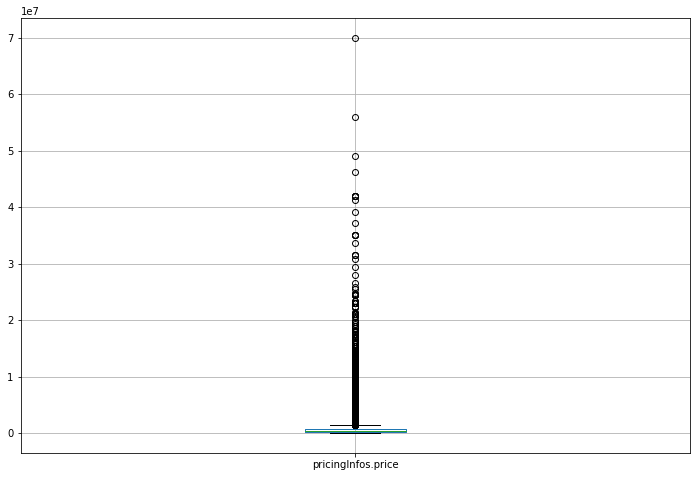

In [7]:
data_3.boxplot (column='pricingInfos.price', figsize = (12,8))

In [8]:
k = 10
#teste_sale = remove_outlier(teste_sale, 'pricingInfos.price',10 )
data_3 = remover_outliers(data_3, 'parkingSpaces', k) # ok
data_3 = remover_outliers(data_3, 'usableAreas', k)   # ok
data_3 = remover_outliers(data_3, 'suites', k)
data_3 = remover_outliers(data_3, 'bathrooms', k)
data_3 = remover_outliers(data_3, 'bedrooms', k)
data_3 = remover_outliers(data_3, 'totalAreas', k)
data_3 = remover_outliers(data_3, 'pricingInfos.price', k)
data_3 = remover_outliers(data_3, 'pricingInfos.monthlyCondoFee', k)
data_3 = remover_outliers(data_3, 'pricingInfos.yearlyIptu', k)

-19.0
23.0
-1300.0
1556.0
-20.0
22.0
-19.0
23.0
-8.0
13.0
-1790.0
2095.0
-5364362.5
6282998.75
-8400.0
9240.0
-3150.0
3465.0


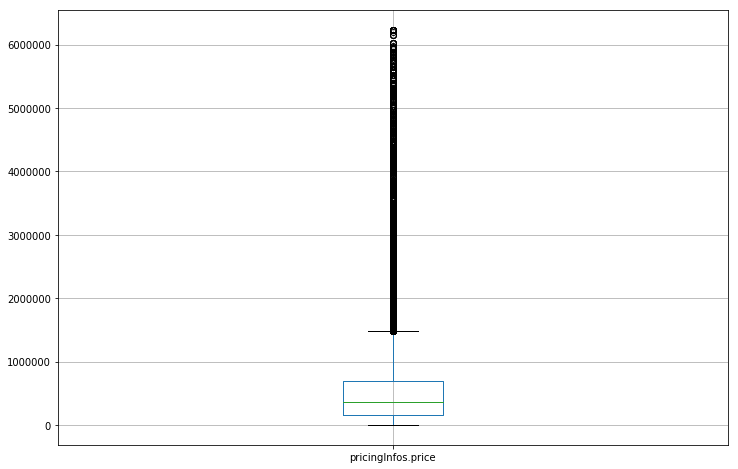

In [9]:
data_3.boxplot (column='pricingInfos.price', figsize = (12,8))

In [10]:
# Chaging some data types
data_3['pricingInfos.price'].astype(float)
data_3['pricingInfos.yearlyIptu'].astype(float)
data_3['pricingInfos.rentalTotalPrice'].astype(float)
data_3['pricingInfos.monthlyCondoFee'].astype(float)
data_3['parkingSpaces'].astype(float)
data_3['suites'].astype(float)
data_3['bathrooms'].astype(float)
data_3['totalAreas'].astype(float)
data_3['bedrooms'].astype(float)
data_3['address.geoLocation.location.lon'].astype(float)
data_3['address.geoLocation.location.lat'].astype(float)


19384    -23.615095
64665    -23.543872
119754   -23.497534
53139    -23.545829
35223    -23.563469
89223    -23.599033
65863    -23.543144
69188    -23.456740
93150    -23.599033
5545     -23.553129
65159    -23.556855
92194    -23.607539
132369   -23.562772
4372     -23.540643
133017   -23.552416
10554    -23.533065
38223    -23.544088
87708    -23.596232
5046     -23.585002
20082    -23.617961
51371    -23.543232
114653   -23.459863
12179    -23.628157
12049    -23.507111
68204    -23.504318
103041   -23.487417
77888    -23.490477
62277    -23.533985
110221   -23.572642
112124   -23.415203
            ...    
37065    -23.563942
9692     -23.630471
78953    -23.486742
19457    -23.612188
35920    -23.574320
80077    -23.487748
106530   -23.576604
17159    -23.613332
124358   -23.465316
120174   -23.477894
68148    -23.502690
8792     -23.654882
11394    -23.569292
116216   -23.489282
66803    -23.456911
67435    -23.490249
119346   -23.527573
2747     -23.685411
130523   -23.549625


Conhecendo as nossas features, deletarei algumas colunas que não usaremos por enquanto

In [11]:
data_3 = data_3.drop([
             'address.city', 'address.country',
             'address.district', 'address.geoLocation.precision', 'address.locationId'
             , 'address.neighborhood', 'address.state', 'address.street'
             , 'address.streetNumber'
             , 'address.unitNumber'
             , 'address.zipCode'
             , 'address.zone'
        ,'createdAt'
        ,'description'
        ,'id'
        ,'images'
        ,'listingStatus'
        ,'owner'
        ,'updatedAt'
        ,'title'],axis = 1)

Não deveremos ter valores nulos no nosso dataset, o nosso modelo pode vir a falhar por isso

In [12]:
data_3.isnull().sum()

address.geoLocation.location.lat        8
address.geoLocation.location.lon        8
bathrooms                               0
bedrooms                                0
parkingSpaces                           0
pricingInfos.businessType               0
pricingInfos.monthlyCondoFee            0
pricingInfos.period                 42507
pricingInfos.price                      0
pricingInfos.rentalTotalPrice       42645
pricingInfos.yearlyIptu                 0
publicationType                         0
publisherId                             0
suites                                  0
totalAreas                              0
unitTypes                               0
usableAreas                             0
dtype: int64

In [13]:
data_3 = data_3.dropna(subset=['address.geoLocation.location.lat'])

## Hora da estatística(_de novo_)
###### E algumas visualizações para análise dos dados

In [14]:
data_3.describe()

,address.geoLocation.location.lat,address.geoLocation.location.lon,bathrooms,bedrooms,parkingSpaces,pricingInfos.monthlyCondoFee,pricingInfos.price,pricingInfos.rentalTotalPrice,pricingInfos.yearlyIptu,suites,totalAreas,usableAreas
count,54663.000000,54663.000000,54663.000000,54663.000000,54663.000000,54663.000000,5.466300e+04,1.202200e+04,54663.000000,54663.000000,54663.000000,54663.000000
mean,-23.561122,-46.649577,2.301868,2.287964,2.146424,604.005964,5.923797e+05,6.709421e+03,269.310466,1.039277,176.039478,153.055723
std,0.049182,0.065109,1.695413,1.273394,1.989453,907.731211,7.693927e+05,1.374709e+04,508.557195,1.148633,209.241061,153.786205
min,-23.848153,-46.805169,0.000000,0.000000,0.000000,0.000000,7.700000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,-23.600014,-46.688540,1.000000,2.000000,1.000000,0.000000,1.645000e+05,2.240000e+03,0.000000,0.000000,56.000000,60.000000
50%,-23.562070,-46.658294,2.000000,2.000000,2.000000,329.000000,3.710000e+05,3.779000e+03,65.000000,1.000000,110.000000,105.000000
75%,-23.538891,-46.611703,3.000000,3.000000,3.000000,832.000000,6.930000e+05,8.049000e+03,280.000000,1.000000,220.000000,192.000000
max,-23.401190,-46.374183,22.000000,12.000000,22.000000,9177.000000,6.237000e+06,1.190000e+06,3452.000000,10.000000,2046.000000,1552.000000


E histogramas

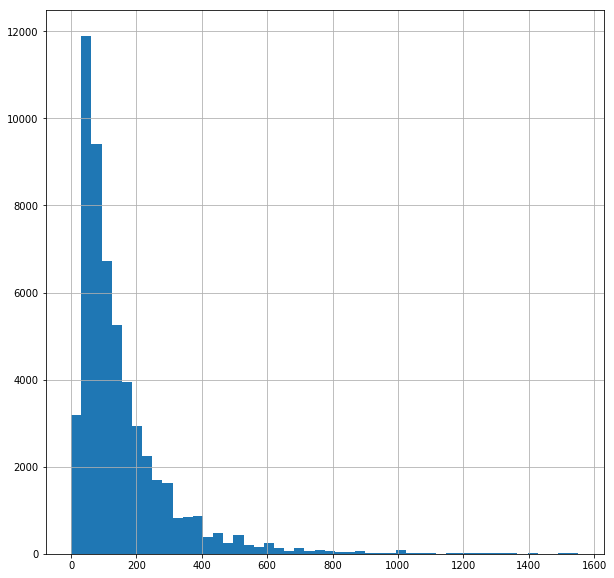

In [15]:
data_3['usableAreas'].hist(bins=50, figsize=(10,10))

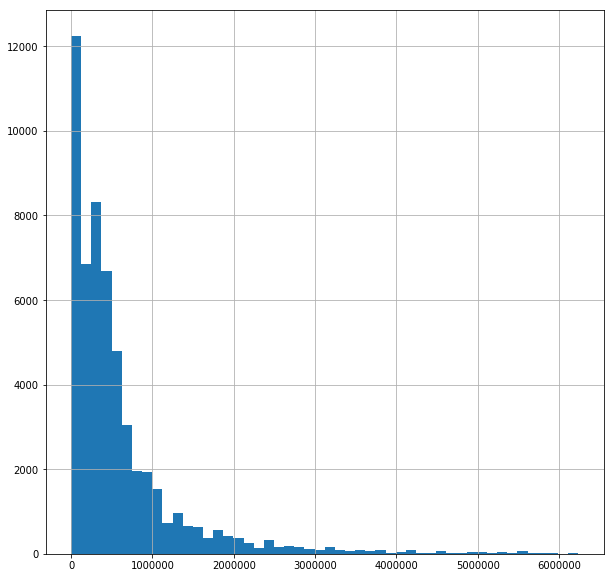

In [16]:
data_3['pricingInfos.price'].hist(bins=50, figsize=(10,10))

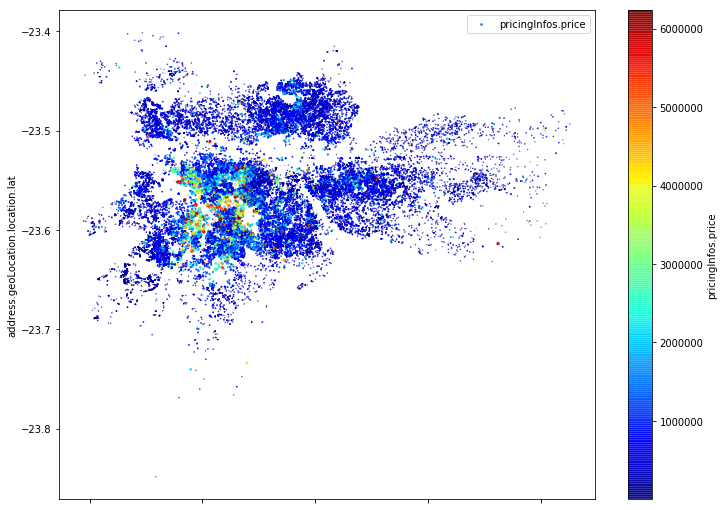

In [17]:
#Preço/geolocalização

data_3.plot(kind='scatter', x='address.geoLocation.location.lon', y='address.geoLocation.location.lat', alpha=0.8, 
    s=data_3['pricingInfos.price']/1000000, label='pricingInfos.price', figsize=(12,9), 
    c='pricingInfos.price', cmap=plt.get_cmap('jet'), colorbar=True)

Matriz de correlação

In [18]:
corr_matrix = data_3.corr()

In [19]:
corr_matrix['pricingInfos.price'].sort_values(ascending=False)

pricingInfos.price                  1.000000
suites                              0.478512
usableAreas                         0.429035
bathrooms                           0.394729
totalAreas                          0.369119
bedrooms                            0.365777
parkingSpaces                       0.309212
pricingInfos.monthlyCondoFee        0.274978
pricingInfos.rentalTotalPrice       0.273705
pricingInfos.yearlyIptu             0.267606
address.geoLocation.location.lat   -0.049801
address.geoLocation.location.lon   -0.070173
Name: pricingInfos.price, dtype: float64

## Criando e testando modelos

Para testarmos os nossos modelos antes de colocarmos em produção, criamos um dataframe de teste onde nós temos todos os dados, treinaremos e validaremos os nossos modelos a partir desse dataframe de teste, esse dataframe foi criado na segunda entrada.

Usamos o train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) deixando 20% dos nossos dados para teste.

Também separaremos os registros entre para Vendas e para Aluguéis

In [20]:
# Rapida limpeza do nosso df de teste 
teste_sale = data_3_test[data_3_test['pricingInfos.businessType'].apply(lambda x:x in ['SALE'])]

teste_sale=teste_sale.drop(['pricingInfos.businessType',
                                        'pricingInfos.period','pricingInfos.rentalTotalPrice',
                                        'publicationType','publisherId'], axis=1)

teste_sale = remover_outliers(teste_sale, 'pricingInfos.price',10)
teste_sale['bedrooms'] = teste_sale['bedrooms'].fillna(teste_sale['bedrooms'].median())
teste_sale['address.geoLocation.location.lat'] = teste_sale['address.geoLocation.location.lat'].fillna(teste_sale['address.geoLocation.location.lat'].median())
teste_sale['address.geoLocation.location.lon'] = teste_sale['address.geoLocation.location.lon'].fillna(teste_sale['address.geoLocation.location.lon'].median())
teste_sale['bathrooms'] = teste_sale['bathrooms'].fillna(teste_sale['bathrooms'].median())
teste_sale['suites'] = teste_sale['suites'].fillna(teste_sale['suites'].median())
teste_sale['parkingSpaces'] = teste_sale['parkingSpaces'].fillna(teste_sale['parkingSpaces'].median())
teste_sale['pricingInfos.monthlyCondoFee'] = teste_sale['pricingInfos.monthlyCondoFee'].fillna(teste_sale['pricingInfos.monthlyCondoFee'].median())
teste_sale['pricingInfos.yearlyIptu'] = teste_sale['pricingInfos.yearlyIptu'].fillna(teste_sale['pricingInfos.yearlyIptu'].median())
teste_sale['totalAreas'] = teste_sale['totalAreas'].fillna(teste_sale['totalAreas'].median())
teste_sale['usableAreas'] = teste_sale['usableAreas'].fillna(teste_sale['usableAreas'].median())

-5625200.0
6811000.0


In [21]:
teste_rental = data_3_test[data_3_test['pricingInfos.businessType'].apply(lambda x:x in ['RENTAL'])]

teste_rental = teste_rental.drop(['pricingInfos.businessType','pricingInfos.period'
                                  ,'pricingInfos.monthlyCondoFee','pricingInfos.price'
                                  ,'publicationType','publisherId','totalAreas'], axis=1)

teste_rental = remover_outliers(teste_rental, 'pricingInfos.rentalTotalPrice',10)
teste_rental['bedrooms'] = teste_rental['bedrooms'].fillna(teste_rental['bedrooms'].median())
teste_rental['address.geoLocation.location.lat'] = teste_rental['address.geoLocation.location.lat'].fillna(teste_rental['address.geoLocation.location.lat'].median())
teste_rental['address.geoLocation.location.lon'] = teste_rental['address.geoLocation.location.lon'].fillna(teste_rental['address.geoLocation.location.lon'].median())
teste_rental['bathrooms'] = teste_rental['bathrooms'].fillna(teste_rental['bathrooms'].median())
teste_rental['suites'] = teste_rental['suites'].fillna(teste_rental['suites'].median())
teste_rental['parkingSpaces'] = teste_rental['parkingSpaces'].fillna(teste_rental['parkingSpaces'].median())
teste_rental['pricingInfos.yearlyIptu'] = teste_rental['pricingInfos.yearlyIptu'].fillna(teste_rental['pricingInfos.yearlyIptu'].median())
teste_rental['usableAreas'] = teste_rental['usableAreas'].fillna(teste_rental['usableAreas'].median())

-65590.0
77000.0


In [23]:
data_3['pricingInfos.period'].value_counts()

MONTHLY    12156
DAILY          2
YEARLY         2
Name: pricingInfos.period, dtype: int64

In [24]:
#Drop yearly/daily 
data_3 = data_3[~data_3['pricingInfos.period'].str.contains('DAILY', na = False)]
data_3 = data_3[~data_3['pricingInfos.period'].str.contains('YEARLY', na = False)]

In [25]:
# Pegar apenas os registros de venda
data_3_sale = data_3[data_3['pricingInfos.businessType'].apply(lambda x:x in ['SALE'])]

Para a columa de tipos de unidades, codificaremos os textos 

In [26]:
le = LabelEncoder()
le.fit(teste_sale['unitTypes'])
teste_sale['unitTypes'] = le.transform(teste_sale['unitTypes'])
le.fit(data_3_sale['unitTypes'])
data_3_sale['unitTypes'] = le.transform(data_3_sale['unitTypes'])

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Agora deveremos separar as variáveis preditoras(x) e o nosso alvo(Preço)(y)

In [27]:
x_treino = data_3_sale[['address.geoLocation.location.lat','address.geoLocation.location.lon','bathrooms'
                         ,'bedrooms','parkingSpaces','pricingInfos.monthlyCondoFee'
                     ,'pricingInfos.yearlyIptu','suites','unitTypes','usableAreas']]
y_treino = data_3_sale['pricingInfos.price']


x_teste = teste_sale[['address.geoLocation.location.lat','address.geoLocation.location.lon','bathrooms'
                         ,'bedrooms','parkingSpaces','pricingInfos.monthlyCondoFee'
                     ,'pricingInfos.yearlyIptu','suites','unitTypes','usableAreas''']]
y_teste = teste_sale['pricingInfos.price']

## Treinando modelos

Para o nosso desafio, usaremos Floresta Aleatória (Random Forest) e Árvore de Decisão (Decision Tree) e para avaliar nossos modelos usaremos alguns modelos de _score_(GridSearchCV) e o mean_squared_error(mse) que nos traz a média da diferença entre o valor estimado e o valor atual. 

* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_treino,y_treino)
y_pred = dt.predict(x_treino)
mse = mean_squared_error(y_treino, y_pred)
final_mse = np.sqrt(mse)
print(final_mse)

# Results:
# 8.942,45   / DF Treino
# 455.017,95 / DF Teste

Podemos obeservar no caso da arvore de decisão um caso de overfitting.

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_treino,y_treino)
y_pred = rf.predict(x_treino)
mse = mean_squared_error(y_treino, y_pred)
final_mse = np.sqrt(mse)
print(final_mse)

# Results:
# 134.991,01  / DF Treino
# 345.346,02  / DF Teste

Como a Floresta Aleatória perfomou melhor no nosso modelo, iremos trabalhar com ele daqui pra frente. Começaremos a trabalhar com os _hyperparameters_ com GridSearch

In [ ]:
parametros = [{'n_estimators':[20, 40, 50], 'max_features': [7, 9, 11]}]
grid_search = GridSearchCV(rf, parametros, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_treino,y_treino)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

# Results 1:
'''rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)'''
                      
# Results 2:
# Top 3 features: 
# 'usableAreas': 0.48659525 
# 'pricingInfos.monthlyCondoFee': 0.17287329
# 'address.geoLocation.location.lon': 0.10273496

Faremos a validação agora com o nosso novo parametro, testaremos ele com o df de treino e o de teste.

In [ ]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rf.fit(x_treino,y_treino)
y_pred = rf.predict(y_treino)
mse = mean_squared_error(y_treino, y_pred)
final_mse = np.sqrt(mse)
print(final_mse)

# Results:
# 330.029,01

Então esse é o nosso modelo final, como o dataset é pesado, rodai o modelo final direto no PyCharm, que o código e o arquivo csv estará no repositório GitHub.